## Тема “Обучение без учителя”

#### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.\
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.\
Создайте датафреймы X и y из этих данных.\
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.\
Масштабируйте данные с помощью StandardScaler.\
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.\
Постройте диаграмму рассеяния на этих данных.


#### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.\
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.\
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.\
Вычислите средние значения price и CRIM в разных кластерах.\

#### * Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.\
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [10]:
boston = load_boston()

In [12]:
data = boston['data']
feature_names = boston['feature_names']

In [13]:
X = pd.DataFrame(data, columns=feature_names)

In [14]:
target = boston['target']

In [15]:
y = pd.DataFrame(target, columns=['price'])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
scaler = StandardScaler(with_mean=False)

In [21]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [23]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [24]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

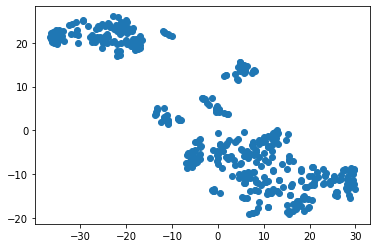

In [25]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

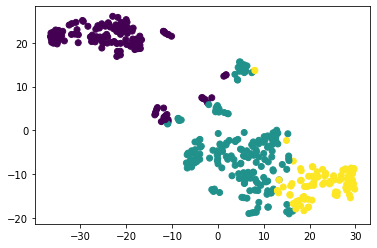

In [28]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [29]:
print('Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

Кластер 0: 11.072337984496126
Кластер 1: 0.3902225925925925
Кластер 3: 0.07167267441860468


In [32]:
print('Кластер 0: {}'.format(y_train.loc[labels_train == 0, 'price'].mean()))
print('Кластер 1: {}'.format(y_train.loc[labels_train == 1, 'price'].mean()))
print('Кластер 2: {}'.format(y_train.loc[labels_train == 2, 'price'].mean()))

Кластер 0: 16.303875968992248
Кластер 1: 24.669312169312175
Кластер 2: 28.72093023255814


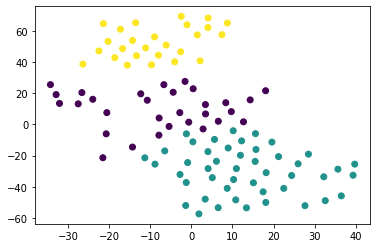

In [34]:
X_test_tsne = tsne.fit_transform(X_test_scaled)
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_train = kmeans.fit_predict(X_test_scaled)

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_train)

plt.show()

In [38]:
labels_test = kmeans.predict(X_test_scaled)

In [39]:
print('Кластер 0: {}'.format(y_test.loc[labels_test == 0, 'price'].mean()))
print('Кластер 1: {}'.format(y_test.loc[labels_test == 1, 'price'].mean()))
print('Кластер 2: {}'.format(y_test.loc[labels_test == 2, 'price'].mean()))

Кластер 0: 18.23
Кластер 1: 26.27173913043479
Кластер 2: 15.788461538461538


In [40]:
print('Кластер 0: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))

Кластер 0: 0.9049549999999997
Кластер 1: 0.19088304347826088
Кластер 2: 10.933312692307691
